# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# importing data

In [8]:
car=pd.read_csv('C:/Users/vella/Downloads/Book1.csv')

In [9]:
car.head()

name   company  year   Price  kms_driven fuel_type
0     Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1     Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2       Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3  Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4               Ford Figo      Ford  2012  175000       41000    Diesel

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
name          816 non-null object
company       816 non-null object
year          816 non-null int64
Price         816 non-null int64
kms_driven    816 non-null int64
fuel_type     816 non-null object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


# removing outlier

In [13]:
car = car[car['Price']<6e6].reset_index(drop = True)

In [14]:
car.describe(include='all')

name company         year         Price     kms_driven  \
count                   815     815   815.000000  8.150000e+02     815.000000   
unique                  254      25          NaN           NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN           NaN            NaN   
freq                     51     221          NaN           NaN            NaN   
mean                    NaN     NaN  2012.442945  4.017933e+05   46277.096933   
std                     NaN     NaN     4.005079  3.815888e+05   34318.459638   
min                     NaN     NaN  1995.000000  3.000000e+04       0.000000   
25%                     NaN     NaN  2010.000000  1.750000e+05   27000.000000   
50%                     NaN     NaN  2013.000000  2.999990e+05   41000.000000   
75%                     NaN     NaN  2015.000000  4.900000e+05   56879.000000   
max                     NaN     NaN  2019.000000  3.100000e+06  400000.000000   

       fuel_type  
count        815  
unique         3  
top       Petrol  
freq         428  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

# Checking relationship of Company with Price

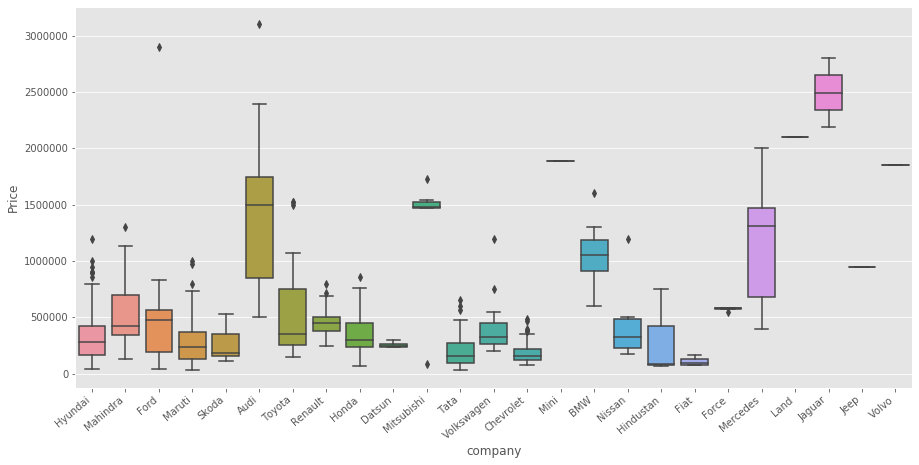

In [15]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of Year with Price

In [16]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking relationship of kms_driven with Price

In [9]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

# Checking relationship of Fuel Type with Price

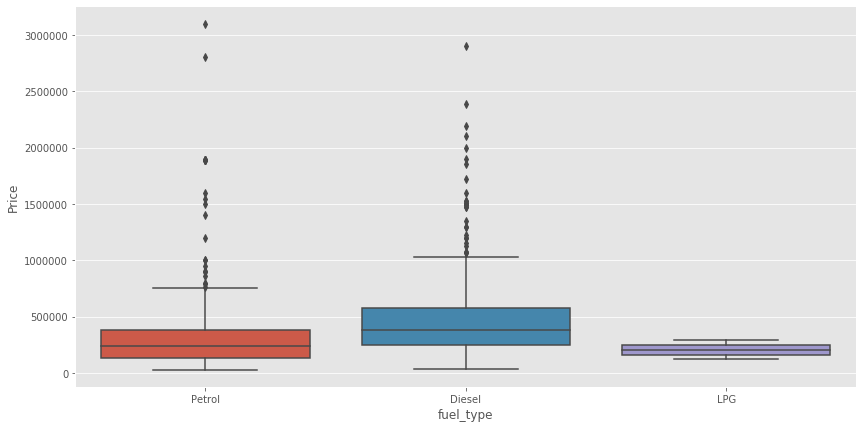

In [10]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

# Relationship of Price with FuelType, Year and Company mixed

In [11]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# Extracting Training Data

In [17]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [18]:
X

name    company  year  kms_driven fuel_type
0       Hyundai Santro Xing    Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550   Mahindra  2006          40    Diesel
2         Hyundai Grand i10    Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium       Ford  2014       36000    Diesel
4                 Ford Figo       Ford  2012       41000    Diesel
5               Hyundai Eon    Hyundai  2013       25000    Petrol
6    Ford EcoSport Ambiente       Ford  2016       24530    Diesel
7        Maruti Suzuki Alto     Maruti  2015       60000    Petrol
8       Skoda Fabia Classic      Skoda  2010       60000    Petrol
9    Maruti Suzuki Stingray     Maruti  2015       30000    Petrol
10        Hyundai Elite i20    Hyundai  2014       32000    Petrol
11     Mahindra Scorpio SLE   Mahindra  2015       48660    Diesel
12      Hyundai Santro Xing    Hyundai  2007       45000    Petrol
13      Mahindra Jeep CL550   Mahindra  2006          40    Diesel
14                  Audi A8       Audi  2017        4000    Petrol
15                  Audi Q7       Audi  2014       16934    Diesel
16     Mahindra Scorpio S10   Mahindra  2016       43000    Diesel
17       Maruti Suzuki Alto     Maruti  2014       35550    Petrol
18     Mahindra Scorpio S10   Mahindra  2016       43000    Diesel
19     Mahindra Scorpio S10   Mahindra  2016       39522    Diesel
20       Maruti Suzuki Alto     Maruti  2015       39000    Petrol
21       Hyundai i20 Sportz    Hyundai  2012       55000    Petrol
22       Hyundai i20 Sportz    Hyundai  2012       55000    Petrol
23       Hyundai i20 Sportz    Hyundai  2012       55000    Petrol
24       Maruti Suzuki Alto     Maruti  2017       72000    Petrol
25     Maruti Suzuki Vitara     Maruti  2016       15975    Diesel
26       Maruti Suzuki Alto     Maruti  2008       70000    Petrol
27       Mahindra Bolero DI   Mahindra  2017       23452    Diesel
28      Maruti Suzuki Swift     Maruti  2014       35522    Diesel
29     Mahindra Scorpio S10   Mahindra  2015       48508    Diesel
..                      ...        ...   ...         ...       ...
785     Maruti Suzuki Wagon     Maruti  2006        7000    Petrol
786             Hyundai Eon    Hyundai  2018       25000    Petrol
787              Tata Manza       Tata  2015      100000    Diesel
788          Toyota Etios G     Toyota  2013       42000    Petrol
789      Hyundai Getz Prime    Hyundai  2009       20000    Petrol
790           Toyota Qualis     Toyota  2003      100000    Diesel
791     Hyundai Santro Xing    Hyundai  2004      137495    Petrol
792         Tata Indica eV2       Tata  2016       91200    Diesel
793          Honda City 1.5      Honda  2009       55000    Petrol
794            Tata Zest XE       Tata  2017      120000    Diesel
795      Mahindra Quanto C4   Mahindra  2013       63000    Diesel
796         Tata Indigo eCS       Tata  2016      104000    Diesel
797     Maruti Suzuki Swift     Maruti  2016      146000    Diesel
798       Hyundai Elite i20    Hyundai  2011       40000    Petrol
799      Hyundai i20 Select    Hyundai  2011       40000    Petrol
800    Chevrolet Tavera Neo  Chevrolet  2007      100800    Diesel
801     Maruti Suzuki Dzire     Maruti  2016      150000    Diesel
802       Hyundai Elite i20    Hyundai  2018        2100    Petrol
803           Honda City VX      Honda  2016       95000    Petrol
804     Maruti Suzuki Dzire     Maruti  2016        2500    Diesel
805            Hyundai Getz    Hyundai  2006       80000    Petrol
806         Mercedes Benz C   Mercedes  2006       15000    Petrol
807      Maruti Suzuki Alto     Maruti  2005       65000    Petrol
808     Maruti Suzuki Swift     Maruti  2009       51000    Diesel
809             Skoda Fabia      Skoda  2009       45000    Petrol
810      Maruti Suzuki Ritz     Maruti  2011       50000    Petrol
811          Tata Indica V2       Tata  2009       30000    Diesel
812    Toyota Corolla Altis     Toyota  2009      132000    Petrol
813

In [19]:
y.shape

(815,)

# Applying Train Test Split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

# Creating a column transformer to transform categorical columns

In [33]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

# Linear Regression Model

In [34]:
lr=LinearRegression()

# Making a pipeline

In [35]:
pipe=make_pipeline(column_trans,lr)

# Fitting the model

In [36]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'B...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop=None,
                                                              

In [37]:
y_pred=pipe.predict(X_test)

# Checking R2 Score

In [38]:
r2_score(y_test,y_pred)

0.5943921835472306

# Finding the model with a random state of TrainTestSplit

In [39]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [40]:
np.argmax(scores)

655

In [41]:
scores[np.argmax(scores)]

0.920088412025344

# The best model is found at a certain random state

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.920088412025344

# Trying to predict the cost of car

Method 1

In [43]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416109.14071676])

Method 2

In [44]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416109.14071676])